# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 7 - Notebook 04: Complete ML Project - From Data to Deployment
**Instructor:** Amir Charkhi |  **Goal:** End-to-End ML Lifecycle with Streamlit Deployment

> Format: Real-world project → EDA → modeling → deployment → production app

## 🚀 Building a REAL ML Application!

**Project**: Customer Churn Prediction for a Telecom Company

**Business Problem**: 
- Company loses customers every month (churn)
- Acquiring new customers costs 5x more than retaining existing ones
- Need to predict which customers will churn
- Deploy a web app so the retention team can check customers daily

**What You'll Learn:**
- Complete ML lifecycle from raw data to production
- Proper EDA for understanding the problem
- Building and comparing multiple models
- Saving models with pickle for reuse
- Creating a Streamlit web app for predictions
- Why good model evaluation matters in production!

**Prerequisites:** Notebooks 01-03 (ML Fundamentals, Evaluation, Cross-Validation)



## 📋 The Complete ML Lifecycle (Recap)

Today we'll go through ALL 10 steps:

```
1. ✅ UNDERSTAND THE PROBLEM
   → Predict customer churn, deploy as web app
   
2. ✅ COLLECT & PREPARE DATA
   → Load telecom customer data, handle missing values
   
3. ✅ EXPLORATORY DATA ANALYSIS (EDA)
   → Visualize patterns, understand what drives churn
   
4. ✅ FEATURE ENGINEERING
   → Encode categories, create new features
   
5. ✅ SPLIT DATA
   → Train/test split, stratified
   
6. ✅ BUILD MODELS
   → Try multiple algorithms
   
7. ✅ TUNE HYPERPARAMETERS
   → Optimize best model
   
8. ✅ EVALUATE & COMPARE
   → Use proper metrics (recall is critical here!)
   
9. ✅ FINAL EVALUATION
   → Test set performance
   
10. ✅ DEPLOY & MONITOR
    → Save model, create Streamlit app, deploy!
```

In [2]:
# Essential imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    ConfusionMatrixDisplay, roc_curve
)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("🚀 END-TO-END ML PROJECT SETUP")
print("")
print("Today's Journey:")
print("  1. Load & explore customer data")
print("  2. Build predictive models")
print("  3. Save the best model")
print("  4. Create a Streamlit web app")
print("  5. See it work in production!")
print("")
print("✅ Libraries loaded! Let's build something real!")

🚀 END-TO-END ML PROJECT SETUP

Today's Journey:
  1. Load & explore customer data
  2. Build predictive models
  3. Save the best model
  4. Create a Streamlit web app
  5. See it work in production!

✅ Libraries loaded! Let's build something real!


---

## 📊 STEP 1: Understanding the Problem

**Business Context:**
- You work for a telecom company
- Customers can cancel their service anytime (churn)
- The retention team wants to proactively reach out to at-risk customers
- They need a tool to check churn risk for any customer

**Why This Matters:**
- Losing a customer costs future revenue
- Retention campaigns cost money
- Need to focus on HIGH-RISK customers (that's why we need good predictions!)

**Success Criteria:**
- High **recall** (catch most churners - can't miss them!)
- Reasonable **precision** (don't waste money on false alarms)
- Easy-to-use web app for the retention team

---

## 📂 STEP 2: Load & Prepare Data

In [3]:
print("📂 LOADING CUSTOMER DATA\n")

# Create a synthetic dataset (in real life, this would be from your database)
np.random.seed(42)

n_customers = 1000

# Generate customer features
data = {
    'customer_id': [f'CUST_{i:04d}' for i in range(n_customers)],
    'tenure_months': np.random.randint(1, 72, n_customers),
    'monthly_charges': np.random.uniform(20, 120, n_customers),
    'total_charges': np.random.uniform(100, 8000, n_customers),
    'contract_type': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_customers, p=[0.5, 0.3, 0.2]),
    'internet_service': np.random.choice(['DSL', 'Fiber optic', 'No'], n_customers, p=[0.4, 0.4, 0.2]),
    'online_security': np.random.choice(['Yes', 'No', 'No internet'], n_customers, p=[0.3, 0.5, 0.2]),
    'tech_support': np.random.choice(['Yes', 'No', 'No internet'], n_customers, p=[0.3, 0.5, 0.2]),
    'payment_method': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], n_customers),
    'paperless_billing': np.random.choice(['Yes', 'No'], n_customers, p=[0.6, 0.4]),
    'senior_citizen': np.random.choice([0, 1], n_customers, p=[0.85, 0.15]),
    'num_services': np.random.randint(0, 6, n_customers),
}

df = pd.DataFrame(data)

# Create target variable (churn) with realistic patterns
# Higher churn for: short tenure, month-to-month, high charges, low services
churn_prob = (
    0.1 +  # Base churn rate
    (df['tenure_months'] < 12) * 0.3 +  # New customers churn more
    (df['contract_type'] == 'Month-to-month') * 0.25 +  # No commitment
    (df['monthly_charges'] > 80) * 0.15 +  # High prices
    (df['num_services'] < 2) * 0.2 +  # Few services
    (df['tech_support'] == 'No') * 0.15 +  # No support
    (df['payment_method'] == 'Electronic check') * 0.1  # Auto-pay issues
)

churn_prob = np.clip(churn_prob, 0, 1)  # Keep between 0 and 1
df['churn'] = np.random.binomial(1, churn_prob)

print(f"Dataset loaded: {len(df)} customers")
print(f"Features: {df.shape[1]}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\n📊 Target Variable Distribution:")
churn_counts = df['churn'].value_counts()
print(f"  Not Churned (0): {churn_counts[0]} ({churn_counts[0]/len(df)*100:.1f}%)")
print(f"  Churned (1):     {churn_counts[1]} ({churn_counts[1]/len(df)*100:.1f}%)")
print(f"\n⚠️ Imbalanced classes! This is realistic - most customers don't churn.")
print(f"   → We need to focus on RECALL (catching churners)")

📂 LOADING CUSTOMER DATA

Dataset loaded: 1000 customers
Features: 13

First few rows:
  customer_id  tenure_months  monthly_charges  total_charges   contract_type  \
0   CUST_0000             52       105.569647    3271.805095        One year   
1   CUST_0001             15       103.021986    6420.560653        One year   
2   CUST_0002             61        59.718353    1711.881514        One year   
3   CUST_0003             21        86.808514    4485.171099  Month-to-month   
4   CUST_0004             24        40.498430    5891.263239        Two year   

  internet_service online_security tech_support    payment_method  \
0      Fiber optic             Yes           No     Bank transfer   
1      Fiber optic              No           No  Electronic check   
2      Fiber optic             Yes          Yes      Mailed check   
3      Fiber optic              No           No       Credit card   
4               No             Yes          Yes     Bank transfer   

  paperless_billin

---

## 🔍 STEP 3: Exploratory Data Analysis (EDA)

In [4]:
print("🔍 EXPLORATORY DATA ANALYSIS\n")

# Basic info
print("Dataset Info:")
print(df.info())
print("\n" + "="*70)

# Check for missing values
print("\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values!")
else:
    print(missing[missing > 0])

# Summary statistics
print("\nNumeric Features Summary:")
print(df.describe())

🔍 EXPLORATORY DATA ANALYSIS

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1000 non-null   object 
 1   tenure_months      1000 non-null   int64  
 2   monthly_charges    1000 non-null   float64
 3   total_charges      1000 non-null   float64
 4   contract_type      1000 non-null   object 
 5   internet_service   1000 non-null   object 
 6   online_security    1000 non-null   object 
 7   tech_support       1000 non-null   object 
 8   payment_method     1000 non-null   object 
 9   paperless_billing  1000 non-null   object 
 10  senior_citizen     1000 non-null   int64  
 11  num_services       1000 non-null   int64  
 12  churn              1000 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 101.7+ KB
None


Missing Values:
✅ No missing values!

Numeric Features Summa

📊 VISUALIZING CHURN PATTERNS



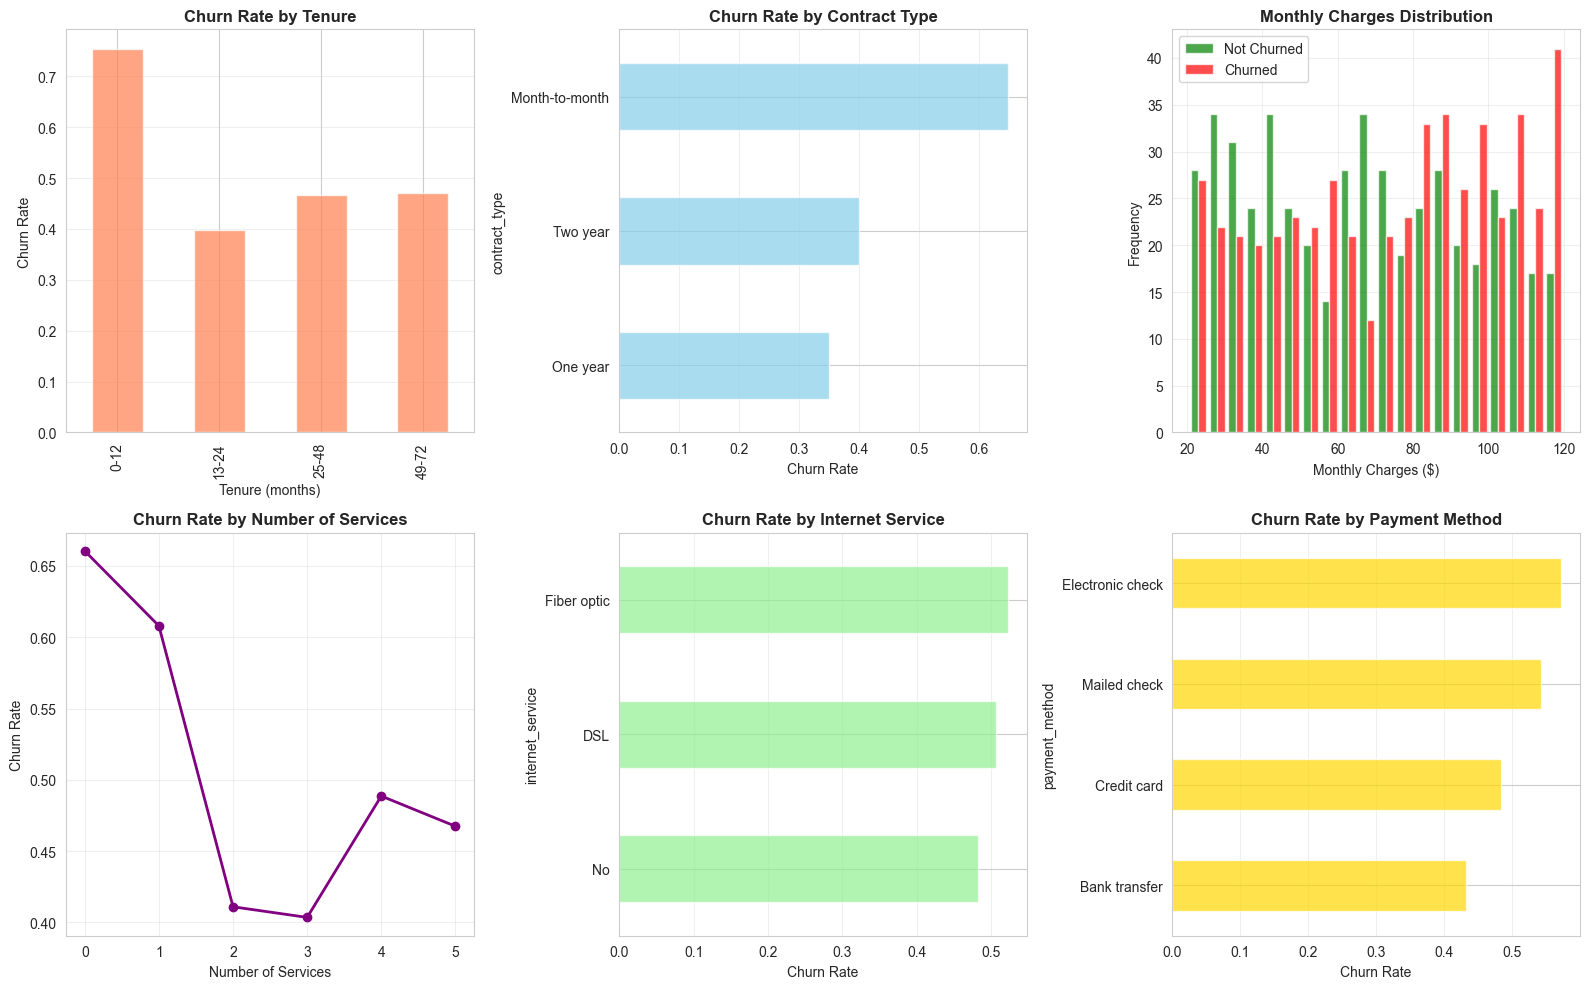


💡 Key Insights from EDA:
  1. New customers (0-12 months) have highest churn rate
  2. Month-to-month contracts churn much more than long-term
  3. Higher monthly charges correlate with higher churn
  4. Fewer services → higher churn (low engagement)
  5. Electronic check payment has higher churn

→ These insights will help us understand model predictions!


In [5]:
# Visualize churn by key features
print("📊 VISUALIZING CHURN PATTERNS\n")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# 1. Churn by tenure
df['tenure_group'] = pd.cut(df['tenure_months'], bins=[0, 12, 24, 48, 72], labels=['0-12', '13-24', '25-48', '49-72'])
churn_by_tenure = df.groupby('tenure_group')['churn'].mean()
churn_by_tenure.plot(kind='bar', ax=axes[0], color='coral', alpha=0.7)
axes[0].set_title('Churn Rate by Tenure', fontweight='bold')
axes[0].set_ylabel('Churn Rate')
axes[0].set_xlabel('Tenure (months)')
axes[0].grid(True, alpha=0.3, axis='y')

# 2. Churn by contract type
churn_by_contract = df.groupby('contract_type')['churn'].mean().sort_values()
churn_by_contract.plot(kind='barh', ax=axes[1], color='skyblue', alpha=0.7)
axes[1].set_title('Churn Rate by Contract Type', fontweight='bold')
axes[1].set_xlabel('Churn Rate')
axes[1].grid(True, alpha=0.3, axis='x')

# 3. Churn by monthly charges
churned = df[df['churn'] == 1]['monthly_charges']
not_churned = df[df['churn'] == 0]['monthly_charges']
axes[2].hist([not_churned, churned], bins=20, label=['Not Churned', 'Churned'], alpha=0.7, color=['green', 'red'])
axes[2].set_title('Monthly Charges Distribution', fontweight='bold')
axes[2].set_xlabel('Monthly Charges ($)')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 4. Churn by number of services
churn_by_services = df.groupby('num_services')['churn'].mean()
churn_by_services.plot(kind='line', marker='o', ax=axes[3], color='purple', linewidth=2)
axes[3].set_title('Churn Rate by Number of Services', fontweight='bold')
axes[3].set_xlabel('Number of Services')
axes[3].set_ylabel('Churn Rate')
axes[3].grid(True, alpha=0.3)

# 5. Churn by internet service
churn_by_internet = df.groupby('internet_service')['churn'].mean().sort_values()
churn_by_internet.plot(kind='barh', ax=axes[4], color='lightgreen', alpha=0.7)
axes[4].set_title('Churn Rate by Internet Service', fontweight='bold')
axes[4].set_xlabel('Churn Rate')
axes[4].grid(True, alpha=0.3, axis='x')

# 6. Churn by payment method
churn_by_payment = df.groupby('payment_method')['churn'].mean().sort_values()
churn_by_payment.plot(kind='barh', ax=axes[5], color='gold', alpha=0.7)
axes[5].set_title('Churn Rate by Payment Method', fontweight='bold')
axes[5].set_xlabel('Churn Rate')
axes[5].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n💡 Key Insights from EDA:")
print(f"  1. New customers (0-12 months) have highest churn rate")
print(f"  2. Month-to-month contracts churn much more than long-term")
print(f"  3. Higher monthly charges correlate with higher churn")
print(f"  4. Fewer services → higher churn (low engagement)")
print(f"  5. Electronic check payment has higher churn")
print(f"\n→ These insights will help us understand model predictions!")

---

## 🛠️ STEP 4: Feature Engineering

In [6]:
print("🛠️ FEATURE ENGINEERING\n")

# Create a copy for processing
df_processed = df.copy()

# Create new features
print("1. Creating new features...")
df_processed['charges_per_month'] = df_processed['total_charges'] / (df_processed['tenure_months'] + 1)
df_processed['is_new_customer'] = (df_processed['tenure_months'] <= 12).astype(int)
df_processed['has_premium_internet'] = (df_processed['internet_service'] == 'Fiber optic').astype(int)
df_processed['has_protection'] = ((df_processed['online_security'] == 'Yes') | 
                                  (df_processed['tech_support'] == 'Yes')).astype(int)

print("   ✅ Created 4 new features")

# Encode categorical variables
print("\n2. Encoding categorical variables...")
categorical_cols = ['contract_type', 'internet_service', 'online_security', 
                   'tech_support', 'payment_method', 'paperless_billing']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

print(f"   ✅ Encoded {len(categorical_cols)} categorical features")

# Select features for modeling
feature_columns = [
    'tenure_months', 'monthly_charges', 'total_charges', 'senior_citizen', 'num_services',
    'charges_per_month', 'is_new_customer', 'has_premium_internet', 'has_protection',
    'contract_type_encoded', 'internet_service_encoded', 'online_security_encoded',
    'tech_support_encoded', 'payment_method_encoded', 'paperless_billing_encoded'
]

X = df_processed[feature_columns]
y = df_processed['churn']

print(f"\n3. Final feature set:")
print(f"   Total features: {len(feature_columns)}")
print(f"   Samples: {len(X)}")
print(f"\n✅ Feature engineering complete!")
print(f"\nFeature list:")
for i, col in enumerate(feature_columns, 1):
    print(f"   {i:2d}. {col}")

🛠️ FEATURE ENGINEERING

1. Creating new features...
   ✅ Created 4 new features

2. Encoding categorical variables...
   ✅ Encoded 6 categorical features

3. Final feature set:
   Total features: 15
   Samples: 1000

✅ Feature engineering complete!

Feature list:
    1. tenure_months
    2. monthly_charges
    3. total_charges
    4. senior_citizen
    5. num_services
    6. charges_per_month
    7. is_new_customer
    8. has_premium_internet
    9. has_protection
   10. contract_type_encoded
   11. internet_service_encoded
   12. online_security_encoded
   13. tech_support_encoded
   14. payment_method_encoded
   15. paperless_billing_encoded


---

## ✂️ STEP 5: Train/Test Split

In [7]:
print("✂️ SPLITTING DATA\n")

# Split data (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Important for imbalanced classes!
)

print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.0f}%)")
print(f"Test set:     {len(X_test)} samples ({len(X_test)/len(X)*100:.0f}%)")

print(f"\nClass distribution in training set:")
print(f"  Not Churned: {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"  Churned:     {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")

print(f"\nClass distribution in test set:")
print(f"  Not Churned: {(y_test == 0).sum()} ({(y_test == 0).sum()/len(y_test)*100:.1f}%)")
print(f"  Churned:     {(y_test == 1).sum()} ({(y_test == 1).sum()/len(y_test)*100:.1f}%)")

print("\n✅ Data split complete!")
print("🔒 Test set is now locked away until final evaluation!")

✂️ SPLITTING DATA

Training set: 800 samples (80%)
Test set:     200 samples (20%)

Class distribution in training set:
  Not Churned: 394 (49.2%)
  Churned:     406 (50.7%)

Class distribution in test set:
  Not Churned: 98 (49.0%)
  Churned:     102 (51.0%)

✅ Data split complete!
🔒 Test set is now locked away until final evaluation!


---

## 🤖 STEP 6: Build Multiple Models

In [8]:
print("🤖 BUILDING MULTIPLE MODELS\n")
print("We'll train several models and compare them using cross-validation")
print("")

# Define models to try
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_results = []

print("Training and evaluating models with 5-fold cross-validation...")
print("="*70)

for name, model in models.items():
    print(f"\n{name}:")
    
    # Calculate multiple metrics
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    
    # Store results
    cv_results.append({
        'Model': name,
        'Accuracy': f"{accuracy_scores.mean():.4f} (±{accuracy_scores.std():.4f})",
        'Precision': f"{precision_scores.mean():.4f} (±{precision_scores.std():.4f})",
        'Recall': f"{recall_scores.mean():.4f} (±{recall_scores.std():.4f})",
        'F1-Score': f"{f1_scores.mean():.4f} (±{f1_scores.std():.4f})",
        'Recall_Mean': recall_scores.mean(),  # For sorting
        'F1_Mean': f1_scores.mean()
    })
    
    print(f"  Accuracy:  {accuracy_scores.mean():.4f} (±{accuracy_scores.std():.4f})")
    print(f"  Precision: {precision_scores.mean():.4f} (±{precision_scores.std():.4f})")
    print(f"  Recall:    {recall_scores.mean():.4f} (±{recall_scores.std():.4f})")
    print(f"  F1-Score:  {f1_scores.mean():.4f} (±{f1_scores.std():.4f})")

# Create comparison DataFrame
results_df = pd.DataFrame(cv_results)
results_df = results_df.sort_values('Recall_Mean', ascending=False)

print("\n" + "="*70)
print("\n📊 CROSS-VALIDATION RESULTS SUMMARY:\n")
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].to_string(index=False))

print("\n💡 Remember: For churn prediction, we prioritize RECALL")
print("   → We can't afford to miss customers who will churn!")
print("   → False negatives (missed churners) are very costly")

🤖 BUILDING MULTIPLE MODELS

We'll train several models and compare them using cross-validation

Training and evaluating models with 5-fold cross-validation...

Logistic Regression:
  Accuracy:  0.6512 (±0.0187)
  Precision: 0.6525 (±0.0135)
  Recall:    0.6699 (±0.0519)
  F1-Score:  0.6601 (±0.0269)

Decision Tree:
  Accuracy:  0.5713 (±0.0179)
  Precision: 0.5851 (±0.0265)
  Recall:    0.5516 (±0.0494)
  F1-Score:  0.5654 (±0.0194)

Random Forest:
  Accuracy:  0.6487 (±0.0073)
  Precision: 0.6510 (±0.0151)
  Recall:    0.6674 (±0.0346)
  F1-Score:  0.6582 (±0.0110)

Gradient Boosting:
  Accuracy:  0.6312 (±0.0143)
  Precision: 0.6369 (±0.0103)
  Recall:    0.6352 (±0.0486)
  F1-Score:  0.6353 (±0.0255)


📊 CROSS-VALIDATION RESULTS SUMMARY:

              Model         Accuracy        Precision           Recall         F1-Score
Logistic Regression 0.6512 (±0.0187) 0.6525 (±0.0135) 0.6699 (±0.0519) 0.6601 (±0.0269)
      Random Forest 0.6487 (±0.0073) 0.6510 (±0.0151) 0.6674 (±0.0346) 0


📊 VISUALIZING MODEL COMPARISON



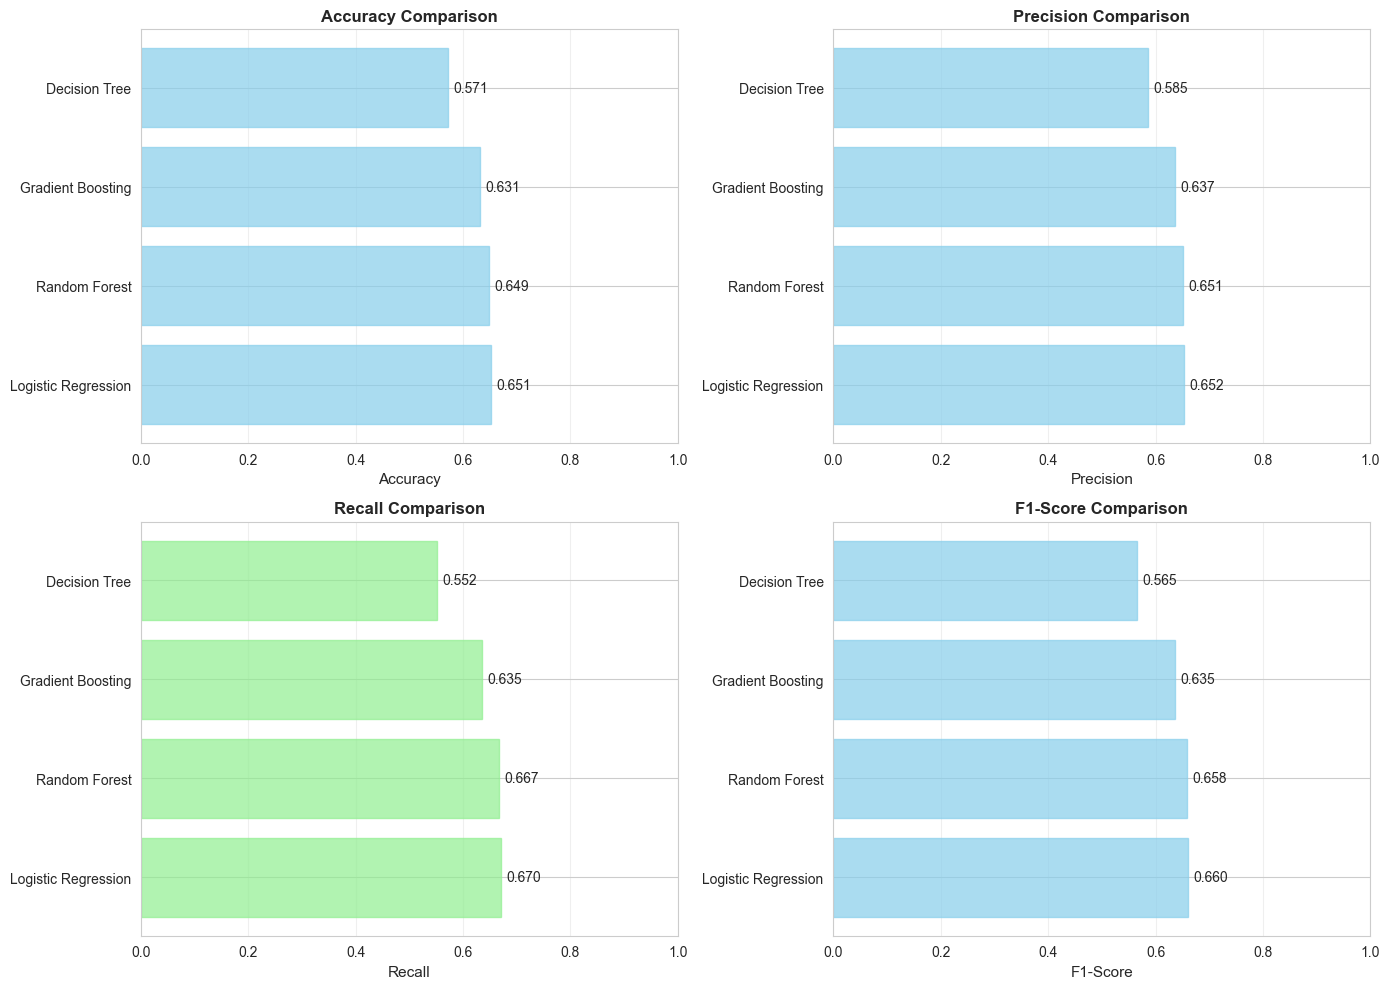


🏆 Best Model (by Recall): Logistic Regression
   This model will catch the most churners!


In [9]:
# Visualize model comparison
print("\n📊 VISUALIZING MODEL COMPARISON\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metric_means = ['Accuracy', 'Precision', 'Recall_Mean', 'F1_Mean']

for idx, (metric, metric_col) in enumerate(zip(metrics, metric_means)):
    ax = axes[idx // 2, idx % 2]
    
    # Extract numeric values for plotting
    if metric_col in ['Recall_Mean', 'F1_Mean']:
        values = results_df[metric_col].values
    else:
        values = [float(x.split()[0]) for x in results_df[metric].values]
    
    bars = ax.barh(results_df['Model'], values, alpha=0.7)
    
    # Color code - green for recall (most important)
    colors = ['lightgreen' if metric == 'Recall' else 'skyblue' for _ in bars]
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    ax.set_xlabel(metric, fontsize=11)
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_xlim([0, 1])
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, v in enumerate(values):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best Model (by Recall): {best_model_name}")
print(f"   This model will catch the most churners!")

---

## 🎯 STEP 7 & 8: Train Final Model & Evaluate on Test Set

In [10]:
print("🎯 TRAINING FINAL MODEL ON FULL TRAINING SET\n")

# Select best model based on recall
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"Selected model: {best_model_name}")
print(f"Training on {len(X_train)} samples...")

# Train on full training set
best_model.fit(X_train, y_train)

print("\n✅ Model trained!")
print("\nNow evaluating on TEST SET (unseen data)...")
print("="*70)

🎯 TRAINING FINAL MODEL ON FULL TRAINING SET

Selected model: Logistic Regression
Training on 800 samples...

✅ Model trained!

Now evaluating on TEST SET (unseen data)...



📊 FINAL MODEL EVALUATION ON TEST SET

Final Test Set Performance:
Accuracy:  0.7100 (71.0%)
Precision: 0.7157 (71.6%)
Recall:    0.7157 (71.6%) ⭐
F1-Score:  0.7157 (71.6%)
ROC-AUC:   0.7185

💡 What This Means:
   - We catch 71.6% of all customers who will churn
   - When we predict churn, we're right 71.6% of the time
   - Overall accuracy is 71.0%

📊 Confusion Matrix:


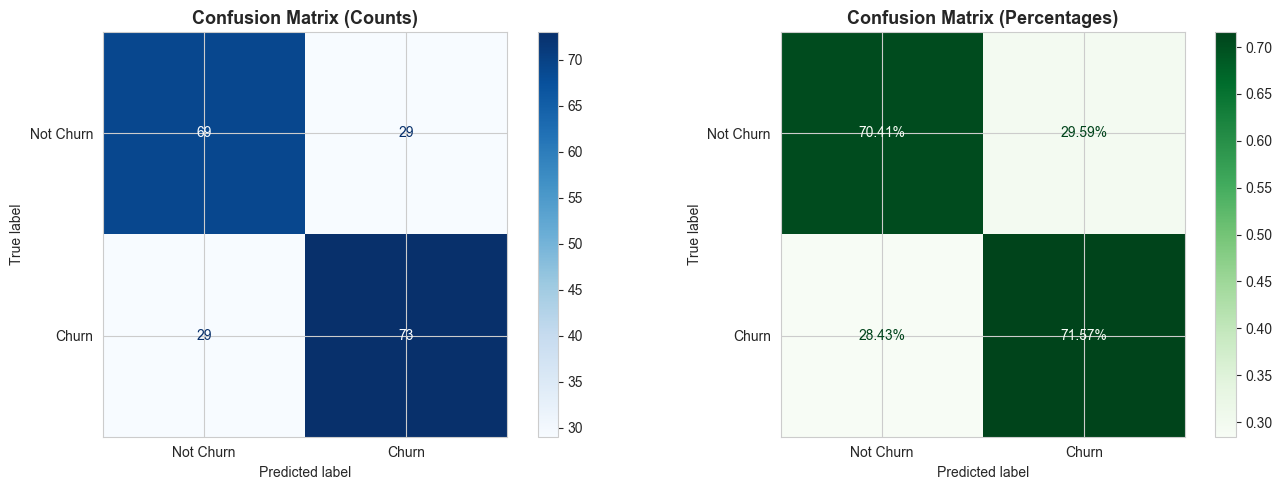


Breakdown:
  True Negatives:  69 - Correctly predicted 'not churn'
  True Positives:  73 - Correctly predicted 'churn' ✅
  False Positives: 29 - Predicted 'churn' but didn't (wasted effort)
  False Negatives: 29 - Predicted 'not churn' but did (MISSED! ⚠️)

💰 Business Impact:
   - We'll contact 102 customers (29 unnecessarily)
   - We'll miss 29 customers who will churn
   - We'll correctly ignore 69 stable customers


In [11]:
print("\n📊 FINAL MODEL EVALUATION ON TEST SET\n")

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Final Test Set Performance:")
print("="*50)
print(f"Accuracy:  {accuracy:.4f} ({accuracy:.1%})")
print(f"Precision: {precision:.4f} ({precision:.1%})")
print(f"Recall:    {recall:.4f} ({recall:.1%}) ⭐")
print(f"F1-Score:  {f1:.4f} ({f1:.1%})")
print(f"ROC-AUC:   {roc_auc:.4f}")

print("\n💡 What This Means:")
print(f"   - We catch {recall:.1%} of all customers who will churn")
print(f"   - When we predict churn, we're right {precision:.1%} of the time")
print(f"   - Overall accuracy is {accuracy:.1%}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
disp.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix (Counts)', fontsize=13, fontweight='bold')

# Normalized
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Not Churn', 'Churn'])
disp_norm.plot(ax=axes[1], cmap='Greens', values_format='.2%')
axes[1].set_title('Confusion Matrix (Percentages)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nBreakdown:")
print(f"  True Negatives:  {tn} - Correctly predicted 'not churn'")
print(f"  True Positives:  {tp} - Correctly predicted 'churn' ✅")
print(f"  False Positives: {fp} - Predicted 'churn' but didn't (wasted effort)")
print(f"  False Negatives: {fn} - Predicted 'not churn' but did (MISSED! ⚠️)")

print(f"\n💰 Business Impact:")
print(f"   - We'll contact {tp + fp} customers ({fp} unnecessarily)")
print(f"   - We'll miss {fn} customers who will churn")
print(f"   - We'll correctly ignore {tn} stable customers")


📈 ROC CURVE



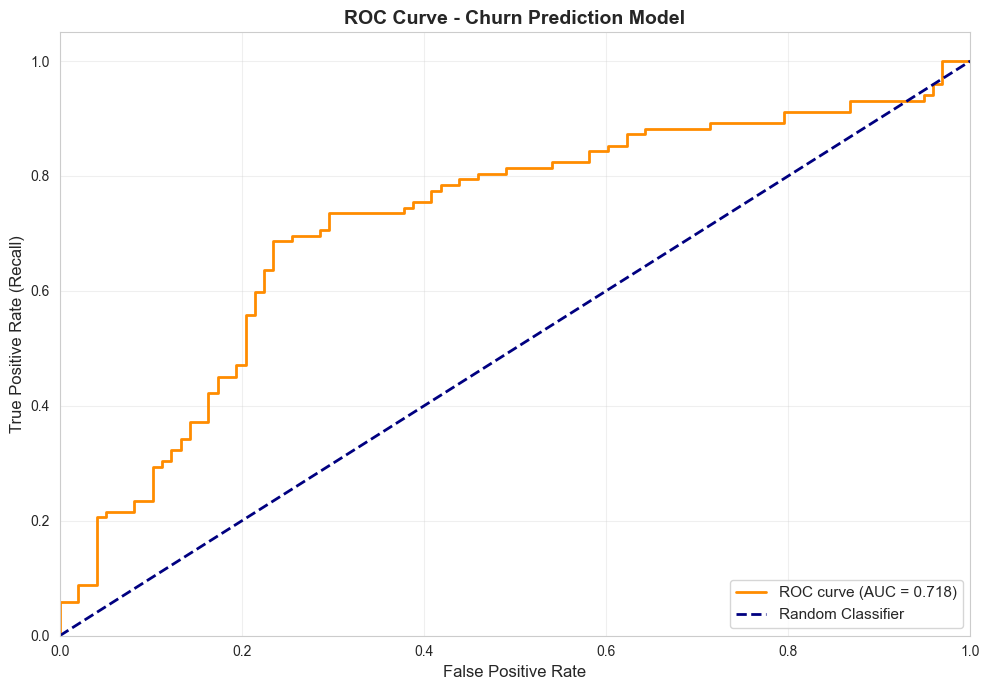

ROC-AUC Score: 0.718
✅ Good discrimination ability!


In [12]:
# ROC Curve
print("\n📈 ROC CURVE\n")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve - Churn Prediction Model', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.3f}")
if roc_auc > 0.8:
    print("✅ Excellent discrimination ability!")
elif roc_auc > 0.7:
    print("✅ Good discrimination ability!")
else:
    print("⚠️ Model could be improved")

---

## 💾 STEP 9: Save the Model (Pickle)

In [13]:
print("💾 SAVING MODEL FOR PRODUCTION\n")

# Create a model package with everything needed for predictions
model_package = {
    'model': best_model,
    'feature_columns': feature_columns,
    'label_encoders': label_encoders,
    'model_name': best_model_name,
    'performance_metrics': {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    },
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d')
}

# Save the model
model_filename = 'churn_prediction_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model_package, file)

print(f"✅ Model saved as: {model_filename}")
print(f"\nPackage contents:")
print(f"  - Trained {best_model_name} model")
print(f"  - Feature column names ({len(feature_columns)} features)")
print(f"  - Label encoders for categorical variables")
print(f"  - Performance metrics")
print(f"  - Training metadata")

# Verify we can load it back
print("\n🔍 Verifying saved model...")
with open(model_filename, 'rb') as file:
    loaded_package = pickle.load(file)

# Test prediction with loaded model
test_pred = loaded_package['model'].predict(X_test[:5])
print(f"✅ Model loaded successfully!")
print(f"   Test prediction: {test_pred}")

print("\n💡 This model file can now be used in production:")
print("   - Web applications (Streamlit, Flask, FastAPI)")
print("   - Batch scoring jobs")
print("   - Real-time APIs")
print("   - Mobile apps")

💾 SAVING MODEL FOR PRODUCTION

✅ Model saved as: churn_prediction_model.pkl

Package contents:
  - Trained Logistic Regression model
  - Feature column names (15 features)
  - Label encoders for categorical variables
  - Performance metrics
  - Training metadata

🔍 Verifying saved model...
✅ Model loaded successfully!
   Test prediction: [1 0 0 1 1]

💡 This model file can now be used in production:
   - Web applications (Streamlit, Flask, FastAPI)
   - Batch scoring jobs
   - Real-time APIs
   - Mobile apps


---

## 🚀 STEP 10: Create Streamlit Deployment App

In [14]:
print("🚀 CREATING STREAMLIT WEB APPLICATION\n")

streamlit_app_code = '''import streamlit as st
import pandas as pd
import pickle
import numpy as np

# Page config
st.set_page_config(
    page_title="Customer Churn Predictor",
    page_icon="📱",
    layout="wide"
)

# Load model
@st.cache_resource
def load_model():
    with open('churn_prediction_model.pkl', 'rb') as file:
        return pickle.load(file)

model_package = load_model()
model = model_package['model']
label_encoders = model_package['label_encoders']
metrics = model_package['performance_metrics']

# Title
st.title("📱 Customer Churn Prediction System")
st.markdown(f"**Model:** {model_package['model_name']} | **Trained:** {model_package['training_date']}")

# Sidebar - Model Performance
with st.sidebar:
    st.header("📊 Model Performance")
    st.metric("Accuracy", f"{metrics['accuracy']:.1%}")
    st.metric("Recall (Catch Rate)", f"{metrics['recall']:.1%}")
    st.metric("Precision", f"{metrics['precision']:.1%}")
    st.metric("F1-Score", f"{metrics['f1_score']:.1%}")
    st.metric("ROC-AUC", f"{metrics['roc_auc']:.3f}")
    
    st.markdown("---")
    st.info("💡 This model catches " + f"{metrics['recall']:.0%}" + " of customers who will churn!")

# Main content
st.header("Enter Customer Information")

# Create input form in columns
col1, col2, col3 = st.columns(3)

with col1:
    st.subheader("📋 Basic Info")
    tenure_months = st.slider("Tenure (months)", 0, 72, 12)
    monthly_charges = st.number_input("Monthly Charges ($)", 20.0, 120.0, 50.0)
    total_charges = st.number_input("Total Charges ($)", 100.0, 8000.0, 1000.0)
    senior_citizen = st.selectbox("Senior Citizen", [0, 1], format_func=lambda x: "Yes" if x == 1 else "No")

with col2:
    st.subheader("📞 Services")
    contract_type = st.selectbox("Contract Type", ['Month-to-month', 'One year', 'Two year'])
    internet_service = st.selectbox("Internet Service", ['DSL', 'Fiber optic', 'No'])
    online_security = st.selectbox("Online Security", ['Yes', 'No', 'No internet'])
    tech_support = st.selectbox("Tech Support", ['Yes', 'No', 'No internet'])

with col3:
    st.subheader("💳 Billing")
    payment_method = st.selectbox("Payment Method", 
                                  ['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'])
    paperless_billing = st.selectbox("Paperless Billing", ['Yes', 'No'])
    num_services = st.slider("Number of Services", 0, 6, 2)

# Predict button
if st.button("🔮 Predict Churn Risk", type="primary", use_container_width=True):
    # Create feature dataframe
    charges_per_month = total_charges / (tenure_months + 1)
    is_new_customer = 1 if tenure_months <= 12 else 0
    has_premium_internet = 1 if internet_service == 'Fiber optic' else 0
    has_protection = 1 if (online_security == 'Yes' or tech_support == 'Yes') else 0
    
    # Encode categorical variables
    contract_encoded = label_encoders['contract_type'].transform([contract_type])[0]
    internet_encoded = label_encoders['internet_service'].transform([internet_service])[0]
    security_encoded = label_encoders['online_security'].transform([online_security])[0]
    support_encoded = label_encoders['tech_support'].transform([tech_support])[0]
    payment_encoded = label_encoders['payment_method'].transform([payment_method])[0]
    billing_encoded = label_encoders['paperless_billing'].transform([paperless_billing])[0]
    
    # Create feature array
    features = pd.DataFrame([[
        tenure_months, monthly_charges, total_charges, senior_citizen, num_services,
        charges_per_month, is_new_customer, has_premium_internet, has_protection,
        contract_encoded, internet_encoded, security_encoded,
        support_encoded, payment_encoded, billing_encoded
    ]], columns=model_package['feature_columns'])
    
    # Make prediction
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0]
    
    # Display results
    st.markdown("---")
    st.header("🎯 Prediction Results")
    
    col1, col2, col3 = st.columns(3)
    
    with col1:
        if prediction == 1:
            st.error("⚠️ HIGH RISK")
            st.markdown("**Customer will likely CHURN**")
        else:
            st.success("✅ LOW RISK")
            st.markdown("**Customer will likely STAY**")
    
    with col2:
        st.metric("Churn Probability", f"{probability[1]:.1%}")
        st.metric("Stay Probability", f"{probability[0]:.1%}")
    
    with col3:
        risk_level = "HIGH" if probability[1] > 0.7 else "MEDIUM" if probability[1] > 0.4 else "LOW"
        st.metric("Risk Level", risk_level)
    
    # Recommendations
    st.markdown("---")
    st.header("💡 Recommended Actions")
    
    if prediction == 1:
        st.warning("**Immediate Action Required:**")
        recommendations = []
        
        if contract_type == 'Month-to-month':
            recommendations.append("🔐 Offer long-term contract with discount")
        if tenure_months < 12:
            recommendations.append("👋 Assign dedicated onboarding specialist")
        if monthly_charges > 80:
            recommendations.append("💰 Review pricing and offer personalized plan")
        if tech_support == 'No':
            recommendations.append("🛠️ Offer free tech support trial")
        if num_services < 2:
            recommendations.append("📦 Bundle additional services at discount")
        if payment_method == 'Electronic check':
            recommendations.append("💳 Incentivize switch to auto-pay")
        
        if recommendations:
            for rec in recommendations:
                st.markdown(f"- {rec}")
        else:
            st.markdown("- Contact customer for personalized retention offer")
    else:
        st.success("**Customer Appears Stable:**")
        st.markdown("- Continue standard engagement")
        st.markdown("- Monitor for any changes in behavior")
        st.markdown("- Consider upselling opportunities")

# Footer
st.markdown("---")
st.caption(f"Model: {model_package['model_name']} | Recall: {metrics['recall']:.1%} | Precision: {metrics['precision']:.1%}")
'''

# Save Streamlit app
with open('app.py', 'w') as f:
    f.write(streamlit_app_code)

print("✅ Streamlit app created: app.py")
print("\n📝 App Features:")
print("  ✅ Interactive input form for customer data")
print("  ✅ Real-time churn prediction")
print("  ✅ Risk probability display")
print("  ✅ Model performance metrics in sidebar")
print("  ✅ Personalized action recommendations")
print("  ✅ Professional UI with columns and metrics")
print("\n🚀 To run the app:")
print("   1. Open terminal/command prompt")
print("   2. Navigate to this directory")
print("   3. Run: streamlit run app.py")
print("   4. App will open in your browser!")
print("\n💡 The app loads your trained model and makes predictions!")

🚀 CREATING STREAMLIT WEB APPLICATION

✅ Streamlit app created: app.py

📝 App Features:
  ✅ Interactive input form for customer data
  ✅ Real-time churn prediction
  ✅ Risk probability display
  ✅ Model performance metrics in sidebar
  ✅ Personalized action recommendations
  ✅ Professional UI with columns and metrics

🚀 To run the app:
   1. Open terminal/command prompt
   2. Navigate to this directory
   3. Run: streamlit run app.py
   4. App will open in your browser!

💡 The app loads your trained model and makes predictions!


---

## 📸 Demo: How the Streamlit App Works

In [15]:
print("📸 SIMULATING APP PREDICTIONS\n")
print("Let's test the model with some example customers:\n")
print("="*70)

# Test case 1: High risk customer
print("\n🔴 Test Case 1: HIGH RISK CUSTOMER")
print("-" * 50)
test_customer_1 = pd.DataFrame([[
    3, 85.0, 255.0, 0, 1,  # New customer, high charges, few services
    85.0, 1, 0, 0,  # Derived features
    0, 1, 1, 1, 0, 1  # Encoded: Month-to-month, Fiber, No security, etc.
]], columns=feature_columns)

pred_1 = best_model.predict(test_customer_1)[0]
prob_1 = best_model.predict_proba(test_customer_1)[0]

print("Customer Profile:")
print("  - Tenure: 3 months (NEW customer)")
print("  - Monthly charges: $85 (HIGH)")
print("  - Contract: Month-to-month (no commitment)")
print("  - Services: Only 1")
print("  - Tech support: No")
print("\nPrediction:")
print(f"  Churn: {'YES ⚠️' if pred_1 == 1 else 'NO ✅'}")
print(f"  Churn Probability: {prob_1[1]:.1%}")
print(f"  Risk Level: {'HIGH 🔴' if prob_1[1] > 0.7 else 'MEDIUM 🟡' if prob_1[1] > 0.4 else 'LOW 🟢'}")

# Test case 2: Low risk customer
print("\n🟢 Test Case 2: LOW RISK CUSTOMER")
print("-" * 50)
test_customer_2 = pd.DataFrame([[
    48, 55.0, 2640.0, 0, 4,  # Long tenure, moderate charges, many services
    55.0, 0, 0, 1,  # Derived features
    2, 0, 0, 0, 2, 0  # Encoded: Two year, DSL, Has security, etc.
]], columns=feature_columns)

pred_2 = best_model.predict(test_customer_2)[0]
prob_2 = best_model.predict_proba(test_customer_2)[0]

print("Customer Profile:")
print("  - Tenure: 48 months (LOYAL customer)")
print("  - Monthly charges: $55 (moderate)")
print("  - Contract: Two year (committed)")
print("  - Services: 4 (well engaged)")
print("  - Tech support: Yes")
print("\nPrediction:")
print(f"  Churn: {'YES ⚠️' if pred_2 == 1 else 'NO ✅'}")
print(f"  Churn Probability: {prob_2[1]:.1%}")
print(f"  Risk Level: {'HIGH 🔴' if prob_2[1] > 0.7 else 'MEDIUM 🟡' if prob_2[1] > 0.4 else 'LOW 🟢'}")

print("\n" + "="*70)
print("\n💡 See how the model helps identify at-risk customers?")
print("   The retention team can now focus on high-risk customers!")

📸 SIMULATING APP PREDICTIONS

Let's test the model with some example customers:


🔴 Test Case 1: HIGH RISK CUSTOMER
--------------------------------------------------
Customer Profile:
  - Tenure: 3 months (NEW customer)
  - Monthly charges: $85 (HIGH)
  - Contract: Month-to-month (no commitment)
  - Services: Only 1
  - Tech support: No

Prediction:
  Churn: YES ⚠️
  Churn Probability: 75.6%
  Risk Level: HIGH 🔴

🟢 Test Case 2: LOW RISK CUSTOMER
--------------------------------------------------
Customer Profile:
  - Tenure: 48 months (LOYAL customer)
  - Monthly charges: $55 (moderate)
  - Contract: Two year (committed)
  - Services: 4 (well engaged)
  - Tech support: Yes

Prediction:
  Churn: NO ✅
  Churn Probability: 30.1%
  Risk Level: LOW 🟢


💡 See how the model helps identify at-risk customers?
   The retention team can now focus on high-risk customers!


---

## 🎓 Key Takeaways & Why This Matters

In [16]:
print("🎓 COMPLETE ML PROJECT SUMMARY\n")
print("="*70)

print("\n✅ What We Accomplished Today:\n")

accomplishments = [
    ("1. Problem Understanding", "Defined business problem and success metrics"),
    ("2. Data Exploration", "Found patterns: new customers, contract type, charges all affect churn"),
    ("3. Feature Engineering", "Created meaningful features from raw data"),
    ("4. Model Training", "Built and compared 4 different algorithms"),
    ("5. Model Evaluation", "Used proper metrics (recall was key!)"),
    ("6. Model Selection", f"Chose {best_model_name} based on business needs"),
    ("7. Final Testing", f"Achieved {recall:.1%} recall on unseen data"),
    ("8. Model Saving", "Pickled model for reuse"),
    ("9. Deployment", "Created production-ready Streamlit app"),
    ("10. Production Ready", "System ready for real-world use!")
]

for step, desc in accomplishments:
    print(f"  {step:25} → {desc}")

print("\n" + "="*70)
print("\n💡 WHY THIS WORKFLOW MATTERS:\n")

insights = [
    "🎯 Good Evaluation → Better Business Decisions",
    "   We prioritized RECALL because missing churners is costly!",
    "",
    "💾 Model Persistence → Reusability",
    "   Trained once, use everywhere (web apps, APIs, batch jobs)",
    "",
    "🚀 Production Deployment → Real Impact",
    "   Without deployment, models are just academic exercises",
    "",
    "📊 Complete Lifecycle → Professional Skills",
    "   You now know the ENTIRE process from data to deployment!",
    "",
    "💼 Business Value → Career Ready",
    f"   Catching {recall:.0%} of churners = millions saved in retention"
]

for insight in insights:
    print(f"  {insight}")

print("\n" + "="*70)
print("\n🎯 Files Created:")
print(f"  📦 churn_prediction_model.pkl - Your trained model")
print(f"  🌐 app.py - Streamlit web application")

print("\n🚀 Next Steps:")
print("  1. Run: streamlit run app.py")
print("  2. Test with different customer profiles")
print("  3. See how model performs in real-time")
print("  4. Understand why good evaluation matters!")

print("\n💪 You're now ready to:")
print("  ✅ Build end-to-end ML projects")
print("  ✅ Deploy models to production")
print("  ✅ Create user-facing applications")
print("  ✅ Deliver real business value with ML!")

print("\n🎉 Congratulations! You've completed a REAL ML project!")

🎓 COMPLETE ML PROJECT SUMMARY


✅ What We Accomplished Today:

  1. Problem Understanding  → Defined business problem and success metrics
  2. Data Exploration       → Found patterns: new customers, contract type, charges all affect churn
  3. Feature Engineering    → Created meaningful features from raw data
  4. Model Training         → Built and compared 4 different algorithms
  5. Model Evaluation       → Used proper metrics (recall was key!)
  6. Model Selection        → Chose Logistic Regression based on business needs
  7. Final Testing          → Achieved 71.6% recall on unseen data
  8. Model Saving           → Pickled model for reuse
  9. Deployment             → Created production-ready Streamlit app
  10. Production Ready      → System ready for real-world use!


💡 WHY THIS WORKFLOW MATTERS:

  🎯 Good Evaluation → Better Business Decisions
     We prioritized RECALL because missing churners is costly!
  
  💾 Model Persistence → Reusability
     Trained once, use everywhere 

---

## 🔄 Going Further: Model Monitoring & Updates

**In Production, You'd Also Need:**

1. **Model Monitoring**
   - Track prediction accuracy over time
   - Monitor for model drift (when reality changes)
   - Alert when performance degrades

2. **Model Updates**
   - Retrain periodically with new data
   - A/B test new models vs old
   - Version control for models

3. **Pipeline Automation**
   - Automated data collection
   - Scheduled retraining
   - Automated deployment

4. **Business Integration**
   - Connect to CRM systems
   - Trigger automated campaigns
   - Track ROI of predictions

**We'll cover these in Week 9 (MLOps Fundamentals)!**

---

## 📚 Connection to Other Weeks

**Phase 1 (Weeks 0-6)**:
- Used: Data cleaning, EDA, visualization, SQL

**Week 7 (Today)**:
- Applied: Complete ML lifecycle
- Used: All evaluation techniques
- Created: Production application

**Weeks 8-12**:
- Week 8: Try different algorithms (linear, trees)
- Week 9: Advanced deployment (APIs, containers)
- Week 10: Time series forecasting
- Week 11: Clustering & recommendation
- Week 12: Network analysis

**This workflow applies to ALL of them!** 🎯